<a href="https://colab.research.google.com/github/shreddy1/Analyzing-HeartDisease-using-MachineLearning-techniques/blob/master/HeartDisease_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [219]:
heart= pd.read_csv("/content/heart_Disease.csv")

#Prints the name of the columns of the dataset.
print(heart.columns)

#Prints the number of rows and columns.
print(heart.shape)

#Prints the first 5 rows of the dataset.
heart.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


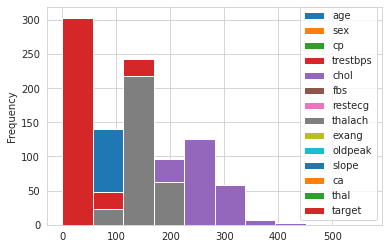

In [220]:
#Histogram fot the Heart Disease dataset.
heart.plot.hist()

In [221]:
#Checks if the dataset has any null values. 
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


1    165
0    138
Name: target, dtype: int64


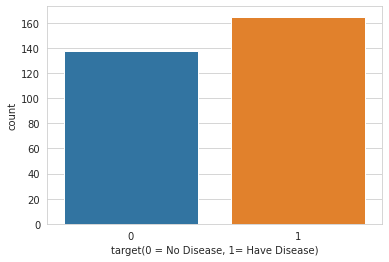

In [222]:
#Prints how many patients have heart disease and how many don't.
print(heart.target.value_counts())

#Bar graph for Heart disease vs no disease.
sns.countplot(x="target", data=heart)
plt.xlabel("target(0 = No Disease, 1= Have Disease)")
plt.show()

In [223]:
#Displays percentage of patients who have heart disease and no disease.
No_Disease = len(heart[heart.target == 0])
Have_Disease = len(heart[heart.target == 1])
print("Patients who don't have Heart Disease: {:.2f}%".format((No_Disease / (len(heart.target))*100)))
print("Patients who have Heart Disease: {:.2f}%".format((Have_Disease / (len(heart.target))*100)))

Patients who don't have Heart Disease: 45.54%
Patients who have Heart Disease: 54.46%


1    207
0     96
Name: sex, dtype: int64


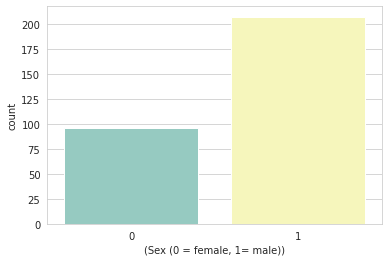

In [224]:
#Prints how many male and female patients are there.
print(heart.sex.value_counts())

#Bar graph for Male and Female patients
sns.countplot(x='sex', data=heart, palette="Set3")
plt.xlabel("(Sex (0 = female, 1= male))")
plt.show()


In [225]:
#Displays percentage of male and female patients.
Numof_Female = len(heart[heart.sex == 0])
Numof_Male = len(heart[heart.sex == 1])
print("Number of Female Patients: {:.2f}%".format((Numof_Female / (len(heart.sex))*100)))
print("Number of Male Patients: {:.2f}%".format((Numof_Male / (len(heart.sex))*100)))

Number of Female Patients: 31.68%
Number of Male Patients: 68.32%


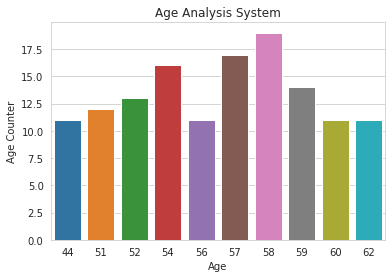

In [226]:
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [227]:
min_age=min(heart.age)
max_age=max(heart.age)
print('Minimum Age :',min_age)
print('Maximum Age :',max_age)


Minimum Age : 29
Maximum Age : 77


In [228]:
young_age=heart[(heart.age>=29)&(heart.age<40)]
middle_age=heart[(heart.age>=40)&(heart.age<55)]
elderly_age=heart[(heart.age>55)]
print('Young Age :',len(young_age))
print('Middle Age :',len(middle_age))
print('Elderly Age :',len(elderly_age))

Young Age : 16
Middle Age : 128
Elderly Age : 151


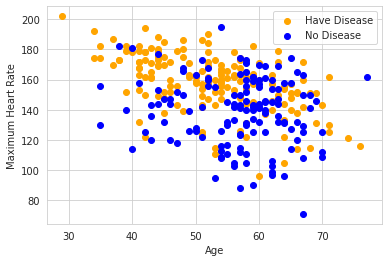

In [229]:
#Scatter plot for Maximum Heart Rate: Disease/Not Disease 
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c="blue")
plt.legend(["Have Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [0]:
x = heart.drop(['target'], axis = 1)
# print(x)
y = heart.target.values
# print(y)

In [0]:
#Training and testing- 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [0]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
# print(ss)

# **Implementing Different Machine Learning Models**

# K-NN Model Classification


In [233]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_cm=confusion_matrix(y_test,knn_prediction)
knn_acc=accuracy_score(knn_prediction,y_test)*100
print("Accuracy of K-NN Model: {:.2f}%".format(knn_acc))

Accuracy of K-NN Model: 81.97%


# Naive Bayes Model Classification

In [234]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_prediction=nb.predict(x_test)
nb_cm=confusion_matrix(y_test,nb_prediction)
#Accuracy Predictor
nb_acc = accuracy_score(nb_prediction,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_acc))

Accuracy of Naive Bayes: 85.25%


# Decision Tree Classifier

In [235]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction=dtc.predict(x_test)
dtc_cm=confusion_matrix(y_test,dtc_prediction)
#Accuracy Predictor
dtc_acc = accuracy_score(dtc_prediction, y_test)*100
print("Decision Tree Model Accuracy {:.2f}%".format(dtc_acc))

Decision Tree Model Accuracy 75.41%


#Logistic Regression Model

In [236]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)
lr_cm=confusion_matrix(y_test,lr_prediction)
lr_acc=accuracy_score(y_test, lr_prediction)*100
print("Logistic Regression Accuracy {:.2f}%".format(lr_acc))

Logistic Regression Accuracy 85.25%


#SVM classifier

In [237]:
svm=SVC(kernel='linear',random_state=0)
svm.fit(x_train,y_train)
svm_prediction=svm.predict(x_test)
svm_cm=confusion_matrix(y_test,svm_prediction)
svm_acc = accuracy_score(y_test, svm_prediction)*100
print("SVM Classifier Accuracy {:.2f}%".format(svm_acc))

SVM Classifier Accuracy 81.97%


# Random Forest Classifier

In [238]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(x_train,y_train)
rfc_prediction=rfc.predict(x_test)
rfc_cm=confusion_matrix(y_test,rfc_prediction)
rfc_acc = accuracy_score(rfc_prediction,y_test)*100
print("Random Forest Classifier Accuracy {:.2f}%".format(rfc_acc))

Random Forest Classifier Accuracy 83.61%


# Comparison of Proposed Models Accuracy Rates

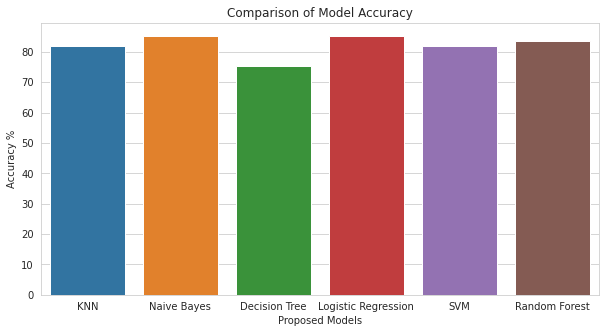

In [251]:
# sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Proposed Models")
sns.barplot(x=['KNN','Naive Bayes','Decision Tree','Logistic Regression','SVM','Random Forest'], y=pd.Series(data=[knn_acc,nb_acc,dtc_acc,lr_acc,svm_acc,rfc_acc]))
plt.title('Comparison of Model Accuracy')
plt.show()